In [130]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns',999)

## Data exploration

In [131]:
df = pd.read_excel("data_clustering.xlsx", sheet_name=0)

In [132]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [133]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [134]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [135]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [136]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [137]:
df[df["Quantity"] < 0 ].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [138]:
df["Invoice"] = df["Invoice"].astype("str")

In [139]:
df[df["Invoice"].str.match("^\\d{6}$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [140]:
df[df["Invoice"].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [141]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [142]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


According to our data description, our column "StockCode" is meant to follow the pattern [0-9]{5} but seems to have legit values for 
[0-9]{5}[a-zA-Z]+. 

Futhermore, we can see other values that don't respect any pattern, such as :
| Code              | Description                                                                                      | Action                   |
|-------------------|--------------------------------------------------------------------------------------------------|--------------------------|
| DCGS              | Looks valid, some quantities are negative though and customer ID is null                        | Exclude from clustering |
| D                 | Looks valid, represents discount values                                                          | Exclude from clustering |
| DOT               | Looks valid, represents postage charges                                                          | Exclude from clustering |
| M or m            | Looks valid, represents manual transactions                                                      | Exclude from clustering |
| C2                | Carriage transaction - not sure what this means                                                  | Exclude from clustering |
| C3                | Not sure, only 1 transaction                                                                     | Exclude                 |
| BANK CHARGES or B | Bank charges                                                                                     | Exclude from clustering |
| S                 | Samples sent to customer                                                                         | Exclude from clustering |
| TESTXXX           | Testing data, not valid                                                                          | Exclude from clustering |
| gift__XXX         | Purchases with gift cards, might be interesting for another analysis, but no customer data       | Exclude                 |
| PADS              | Looks like a legit stock code for padding                                                        | Include                 |
| SP1002            | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing            | Exclude for now         |
| AMAZONFEE         | Looks like fees for Amazon shipping or something                                                 | Exclude for now         |
| ADJUSTX           | Looks like manual account adjustments by admins                                                  | Exclude for now         |


In [143]:
df["StockCode"] = df["StockCode"].astype("str")
uncommon_pattern = df[
    (~df["StockCode"].str.match(r"^\d{5}$")) & 
    (~df["StockCode"].str.match(r"^\d{5}[a-zA-Z]+$"))
]["StockCode"].unique()




In [144]:
for pattern in uncommon_pattern:
    print(f"--- StockCode: {pattern} ---")
    display(df[df["StockCode"] == pattern].head())

--- StockCode: POST ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom


--- StockCode: D ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.00,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.00,United Kingdom


--- StockCode: DCGS0058 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
30671,491969,DCGS0058,MISO PRETTY GUM,1,2009-12-14 17:57:00,0.83,NaN,United Kingdom
31652,491970,DCGS0058,MISO PRETTY GUM,1,2009-12-14 18:03:00,0.83,NaN,United Kingdom


--- StockCode: DCGS0068 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
62734,494918,DCGS0068,DOGS NIGHT COLLAR,1,2010-01-19 17:49:00,8.47,NaN,United Kingdom


--- StockCode: DOT ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom


--- StockCode: M ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.00,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.00,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.00,United Kingdom


--- StockCode: DCGS0004 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
98951,498699,DCGS0004,NaN,-2,2010-02-22 12:32:00,0.00,NaN,United Kingdom
164723,504935,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-04-19 11:19:00,16.98,NaN,United Kingdom
401083,527789,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-10-19 11:10:00,16.98,NaN,United Kingdom


--- StockCode: DCGS0076 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
16426,490741,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 17:56:00,16.48,NaN,United Kingdom
17265,490745,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 18:02:00,16.48,NaN,United Kingdom
20324,491043,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-09 09:51:00,16.48,NaN,United Kingdom
30673,491969,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-14 17:57:00,16.48,NaN,United Kingdom


--- StockCode: C2 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.00,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.00,16253.00,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.00,14911.00,EIRE


--- StockCode: BANK CHARGES ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom


--- StockCode: DCGS0003 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
20249,491041,DCGS0003,BOXED GLASS ASHTRAY,1,2009-12-09 09:42:00,2.57,NaN,United Kingdom
232222,511858,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-11 10:05:00,2.51,NaN,United Kingdom
238355,512437,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-15 16:17:00,2.51,NaN,United Kingdom
244829,513099,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-21 15:13:00,2.51,NaN,United Kingdom
267418,515287,DCGS0003,BOXED GLASS ASHTRAY,1,2010-07-09 14:58:00,2.51,NaN,United Kingdom


--- StockCode: TEST001 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.00,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.00,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.00,United Kingdom


--- StockCode: gift_0001_80 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom
56446,C494472,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,-1,2010-01-14 14:51:00,69.56,NaN,United Kingdom
298842,518488,gift_0001_80,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0072 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30672,491969,DCGS0072,CAT CAMOUFLAGUE COLLAR,1,2009-12-14 17:57:00,5.17,NaN,United Kingdom
34669,492303,DCGS0072,CAT CAMOUFLAGUE COLLAR,2,2009-12-16 11:57:00,5.17,NaN,United Kingdom
41261,492783,DCGS0072,CAT CAMOUFLAGUE COLLAR,1,2009-12-18 17:15:00,5.17,NaN,United Kingdom


--- StockCode: gift_0001_20 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom
45213,493404,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-23 15:30:00,17.39,NaN,United Kingdom
75097,496247,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-01-29 16:11:00,17.02,NaN,United Kingdom
96283,498443,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-02-19 09:49:00,17.02,NaN,United Kingdom


--- StockCode: DCGS0044 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
33819,492226,DCGS0044,HANDZ-OFF CAR FRESHENER,1,2009-12-15 18:33:00,2.57,NaN,United Kingdom


--- StockCode: TEST002 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.00,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.00,NaN,United Kingdom


--- StockCode: gift_0001_10 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
125922,501441,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-16 13:44:00,8.51,NaN,United Kingdom
136604,502486,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-24 17:43:00,8.51,NaN,United Kingdom
218754,510637,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-06-02 11:54:00,8.51,NaN,United Kingdom
298848,518496,gift_0001_10,NaN,10,2010-08-09 12:31:00,0.00,NaN,United Kingdom


--- StockCode: gift_0001_50 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
41263,492783,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2009-12-18 17:15:00,43.48,NaN,United Kingdom
75136,496249,gift_0001_50,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298841,518491,gift_0001_50,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom
376731,525755,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-10-07 10:23:00,42.55,NaN,United Kingdom


--- StockCode: DCGS0066N ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
44245,493265,DCGS0066N,NAVY CUDDLES DOG HOODIE,1,2009-12-22 15:05:00,8.65,NaN,United Kingdom
44335,493268,DCGS0066N,NaN,1,2009-12-22 15:07:00,0.00,NaN,United Kingdom
44377,493269,DCGS0066N,NAVY CUDDLES DOG HOODIE,1,2009-12-22 15:07:00,8.65,NaN,United Kingdom
44609,493289,DCGS0066N,NaN,1,2009-12-22 15:13:00,0.00,NaN,United Kingdom


--- StockCode: gift_0001_30 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45212,493404,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2009-12-23 15:30:00,26.08,NaN,United Kingdom
54564,494380,gift_0001_30,NaN,5,2010-01-13 17:39:00,0.00,NaN,United Kingdom
54636,494381,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-01-13 17:44:00,25.53,NaN,United Kingdom
66801,495343,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-01-22 18:05:00,25.53,NaN,United Kingdom
142163,502872,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-03-29 09:59:00,25.53,NaN,United Kingdom


--- StockCode: PADS ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom


--- StockCode: ADJUST ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.00,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.00,United Kingdom


--- StockCode: gift_0001_40 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75137,496248,gift_0001_40,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298847,518492,gift_0001_40,NaN,10,2010-08-09 12:30:00,0.00,NaN,United Kingdom
299652,518579,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-08-10 12:08:00,31.35,NaN,United Kingdom
407443,528382,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-10-21 18:01:00,34.04,NaN,United Kingdom


--- StockCode: gift_0001_60 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75138,496250,gift_0001_60,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298843,518490,gift_0001_60,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


--- StockCode: gift_0001_70 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75139,496251,gift_0001_70,NaN,2,2010-01-29 16:17:00,0.00,NaN,United Kingdom
235291,512168,gift_0001_70,Dotcomgiftshop Gift Voucher £70.00,1,2010-06-14 11:24:00,59.57,NaN,United Kingdom
298840,518489,gift_0001_70,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


--- StockCode: gift_0001_90 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75141,496252,gift_0001_90,NaN,2,2010-01-29 16:18:00,0.00,NaN,United Kingdom
298839,518487,gift_0001_90,NaN,10,2010-08-09 12:28:00,0.00,NaN,United Kingdom


--- StockCode: DCGSSGIRL ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80231,496722,DCGSSGIRL,NaN,-1,2010-02-03 14:04:00,0.00,NaN,United Kingdom
241372,512738,DCGSSGIRL,update,100,2010-06-17 14:11:00,0.00,NaN,United Kingdom
244831,513099,DCGSSGIRL,GIRLS PARTY BAG,3,2010-06-21 15:13:00,3.36,NaN,United Kingdom
246184,513200,DCGSSGIRL,GIRLS PARTY BAG,6,2010-06-22 16:28:00,3.36,NaN,United Kingdom
249938,513574,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-25 15:13:00,3.36,NaN,United Kingdom


--- StockCode: DCGS0006 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80337,496740,DCGS0006,NaN,-1,2010-02-03 14:28:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0016 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80338,496741,DCGS0016,NaN,-1,2010-02-03 14:29:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0027 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80339,496742,DCGS0027,NaN,-1,2010-02-03 14:29:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0036 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80342,496744,DCGS0036,NaN,-1,2010-02-03 14:35:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0039 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80361,496746,DCGS0039,NaN,-1,2010-02-03 14:36:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0060 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80953,496814,DCGS0060,NaN,-3,2010-02-04 09:46:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0056 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
81143,496855,DCGS0056,NaN,-4,2010-02-04 11:46:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0059 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
82846,496988,DCGS0059,NaN,-8,2010-02-05 11:21:00,0.00,NaN,United Kingdom


--- StockCode: GIFT ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
83304,497107,GIFT,NaN,-9,2010-02-05 15:18:00,0.00,NaN,United Kingdom


--- StockCode: DCGSLBOY ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89000,497811,DCGSLBOY,NaN,-16,2010-02-12 14:45:00,0.00,NaN,United Kingdom


--- StockCode: m ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
96608,498492,m,Manual,1,2010-02-19 10:56:00,2.55,NaN,United Kingdom
96609,498492,m,Manual,1,2010-02-19 10:56:00,3.40,NaN,United Kingdom
157226,504396,m,Manual,1,2010-04-13 11:45:00,4.00,NaN,United Kingdom
228780,511509,m,Manual,1,2010-06-08 15:26:00,2.55,NaN,United Kingdom


--- StockCode: DCGS0053 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98950,498698,DCGS0053,NaN,-2,2010-02-22 12:29:00,0.00,NaN,United Kingdom


--- StockCode: DCGS0062 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98952,498700,DCGS0062,NaN,-1,2010-02-22 12:34:00,0.00,NaN,United Kingdom
414064,528952,DCGS0062,ROAD-RAGE CAR FRESHENER,1,2010-10-25 16:57:00,2.51,NaN,United Kingdom


--- StockCode: DCGS0037 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98953,498701,DCGS0037,NaN,-1,2010-02-22 12:35:00,0.00,NaN,United Kingdom
236545,512289,DCGS0037,KEY-RING CORKSCREW,1,2010-06-14 14:49:00,12.72,NaN,United Kingdom


--- StockCode: DCGSSBOY ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
101692,499040,DCGSSBOY,NaN,-90,2010-02-24 13:16:00,0.00,NaN,United Kingdom
241371,512737,DCGSSBOY,update,100,2010-06-17 14:10:00,0.00,NaN,United Kingdom
244830,513099,DCGSSBOY,BOYS PARTY BAG,5,2010-06-21 15:13:00,3.36,NaN,United Kingdom
246183,513200,DCGSSBOY,BOYS PARTY BAG,7,2010-06-22 16:28:00,3.36,NaN,United Kingdom
249937,513574,DCGSSBOY,BOYS PARTY BAG,3,2010-06-25 15:13:00,3.36,NaN,United Kingdom


--- StockCode: DCGSLGIRL ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
101693,499042,DCGSLGIRL,NaN,-57,2010-02-24 13:31:00,0.00,NaN,United Kingdom


--- StockCode: S ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom


--- StockCode: DCGS0069 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
123592,501161,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-03-15 09:28:00,16.13,NaN,United Kingdom
148841,503549,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-01 15:04:00,16.13,NaN,United Kingdom
151515,503823,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-07 14:59:00,16.13,NaN,United Kingdom
405236,528145,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-10-20 15:56:00,16.13,NaN,United Kingdom


--- StockCode: DCGS0070 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148842,503549,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


--- StockCode: DCGS0075 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148843,503549,DCGS0075,CAMOUFLAGUE DOG LEAD,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


--- StockCode: B ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


--- StockCode: DCGS0041 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
222345,511021,DCGS0041,HAYNES MINI-COOPER PLAYING CARDS,1,2010-06-04 16:13:00,5.06,NaN,United Kingdom


--- StockCode: ADJUST2 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.00,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.00,United Kingdom
249674,513565,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,72.45,16422.00,United Kingdom


--- StockCode: 47503J  ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
260886,514532,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-07-05 10:07:00,16.13,NaN,United Kingdom


--- StockCode: C3 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.00,NaN,United Kingdom


--- StockCode: SP1002 ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


--- StockCode: AMAZONFEE ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom


## Data Cleaning

In [145]:
cleaned_df = df.copy()

In [146]:
cleaned_df.loc[:, "Invoice"] = cleaned_df["Invoice"].astype("str")


mask = (

    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]


In [147]:
cleaned_df.loc[:, "StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
(cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
| (cleaned_df["StockCode"].str.match("^\\d{5}[0-9A-Z]+$") == True)
| (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

In [148]:
cleaned_df.dropna(subset=["Customer ID"], inplace = True)

In [149]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [150]:
len(cleaned_df[cleaned_df["Price"]==0])

28

In [151]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [152]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [153]:
cleaned_df["Price"].min()

0.001

In [154]:
len(cleaned_df)/len(df)

0.7732429238325965

dropped about 23% of records

## Feature Engineering

In [155]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [156]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [163]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index = False)\
 .agg(
          MonetaryValue = ("SalesLineTotal","sum"),
          Frequency = ("Invoice", "nunique"),
          LastInvoiceDate = ("InvoiceDate", "max")
     
)
     

In [165]:
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [188]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [189]:
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


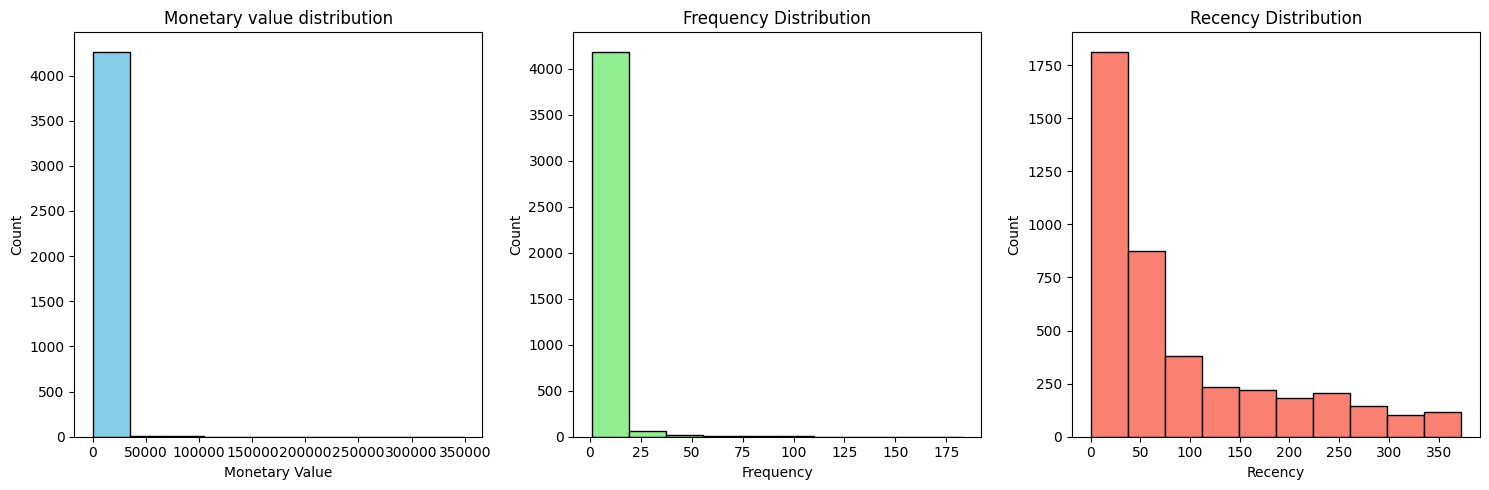

In [199]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1) 
plt.hist(aggregated_df["MonetaryValue"], bins=10, color="skyblue", edgecolor = "black")
plt.title("Monetary value distribution")
plt.xlabel("Monetary Value") 
plt.ylabel("Count")

plt.subplot(1, 3, 2) 
plt.hist(aggregated_df["Frequency"], bins=10, color="lightgreen", edgecolor = "black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency") 
plt.ylabel("Count")


plt.subplot(1, 3, 3) 
plt.hist(aggregated_df["Recency"], bins=10, color="salmon", edgecolor = "black")
plt.title("Recency Distribution")
plt.xlabel("Recency") 
plt.ylabel("Count")

plt.tight_layout()
plt.show()

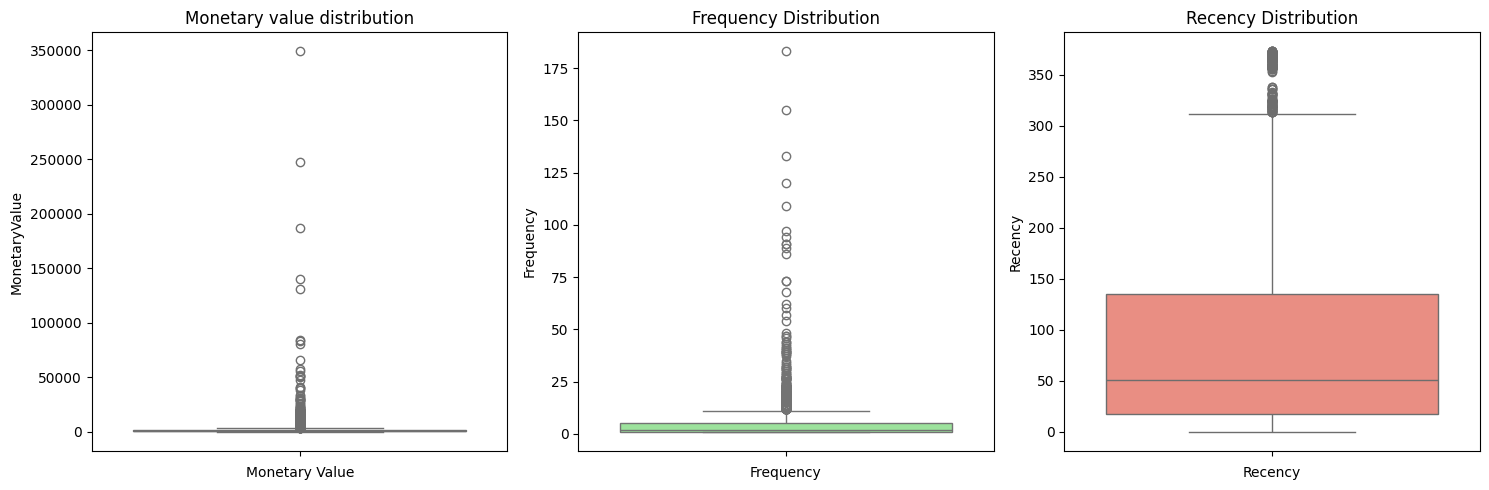

In [201]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1) 
sns.boxplot(data = aggregated_df["MonetaryValue"] ,color="skyblue")
plt.title("Monetary value distribution")
plt.xlabel("Monetary Value") 


plt.subplot(1, 3, 2) 
sns.boxplot(data = aggregated_df["Frequency"],color="lightgreen")
plt.title("Frequency Distribution")
plt.xlabel("Frequency") 


plt.subplot(1, 3, 3) 
sns.boxplot(data = aggregated_df["Recency"], color="salmon")
plt.title("Recency Distribution")
plt.xlabel("Recency") 


plt.tight_layout()
plt.show()

In [207]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR  = M_Q3 - M_Q1

In [211]:
MonetaryValue_outliers = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

In [212]:
MonetaryValue_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [217]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR  = F_Q3 - F_Q1
Frequency_outliers = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

In [218]:
Frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [223]:
non_outliers_df = aggregated_df[(~ aggregated_df.index.isin(MonetaryValue_outliers.index)) & (~ aggregated_df.index.isin(Frequency_outliers.index))]

In [225]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


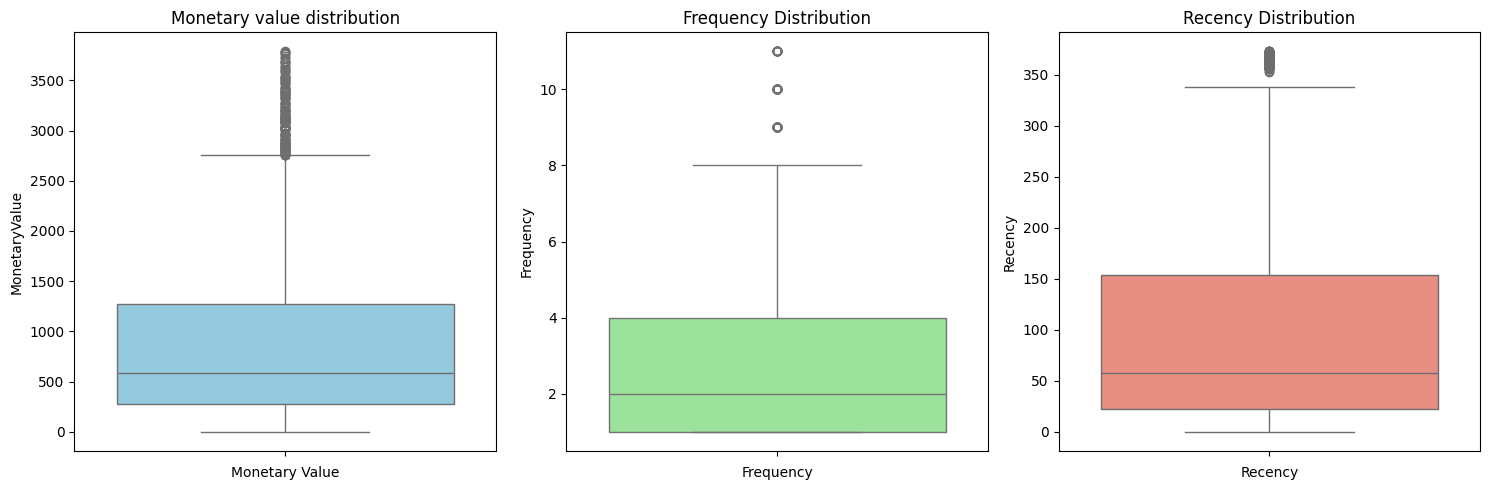

In [226]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1) 
sns.boxplot(data = non_outliers_df["MonetaryValue"] ,color="skyblue")
plt.title("Monetary value distribution")
plt.xlabel("Monetary Value") 


plt.subplot(1, 3, 2) 
sns.boxplot(data = non_outliers_df["Frequency"],color="lightgreen")
plt.title("Frequency Distribution")
plt.xlabel("Frequency") 


plt.subplot(1, 3, 3) 
sns.boxplot(data = non_outliers_df["Recency"], color="salmon")
plt.title("Recency Distribution")
plt.xlabel("Recency") 


plt.tight_layout()
plt.show()

Text(0.5, 0.92, '3D scatter Plot of costumer data')

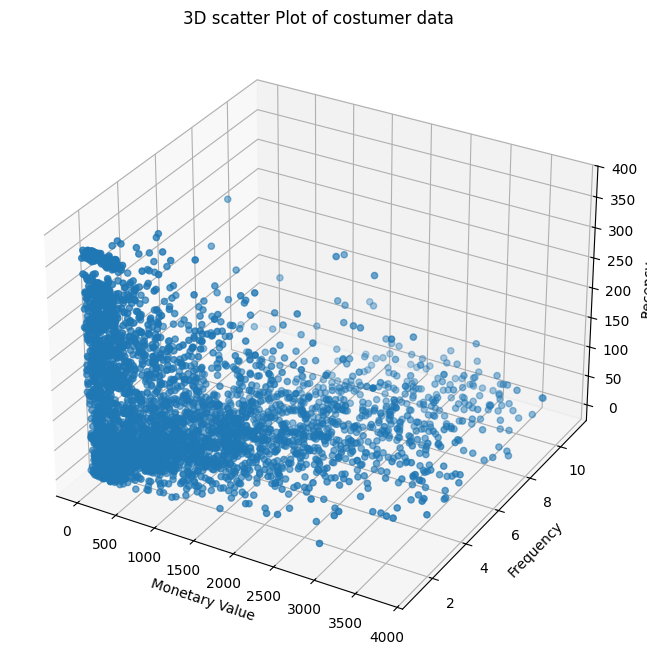

In [229]:
fig  =plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter Plot of costumer data")

Standard scaling transforms the features of our data to have a mean of 0 and a standard deviation of 1,
ensuring that each feature contributes equally to the analysis :
$$z =  \frac{x - \mu}{\sigma}$$

In [231]:
scaler = StandardScaler()

In [237]:
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data_df = pd.DataFrame(scaled_data, index= non_outliers_df.index, columns = ("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


Text(0.5, 0.92, '3D scatter Plot of costumer data')

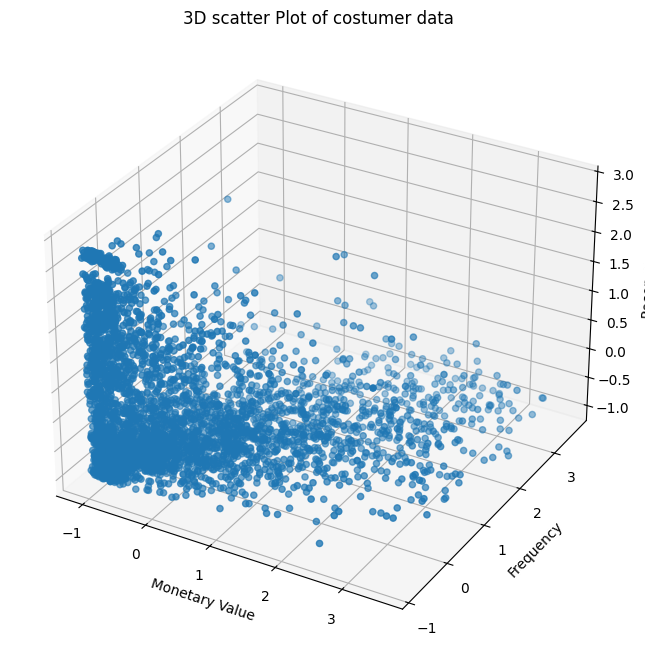

In [238]:
fig  =plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter Plot of costumer data")

## KMeans Clustering

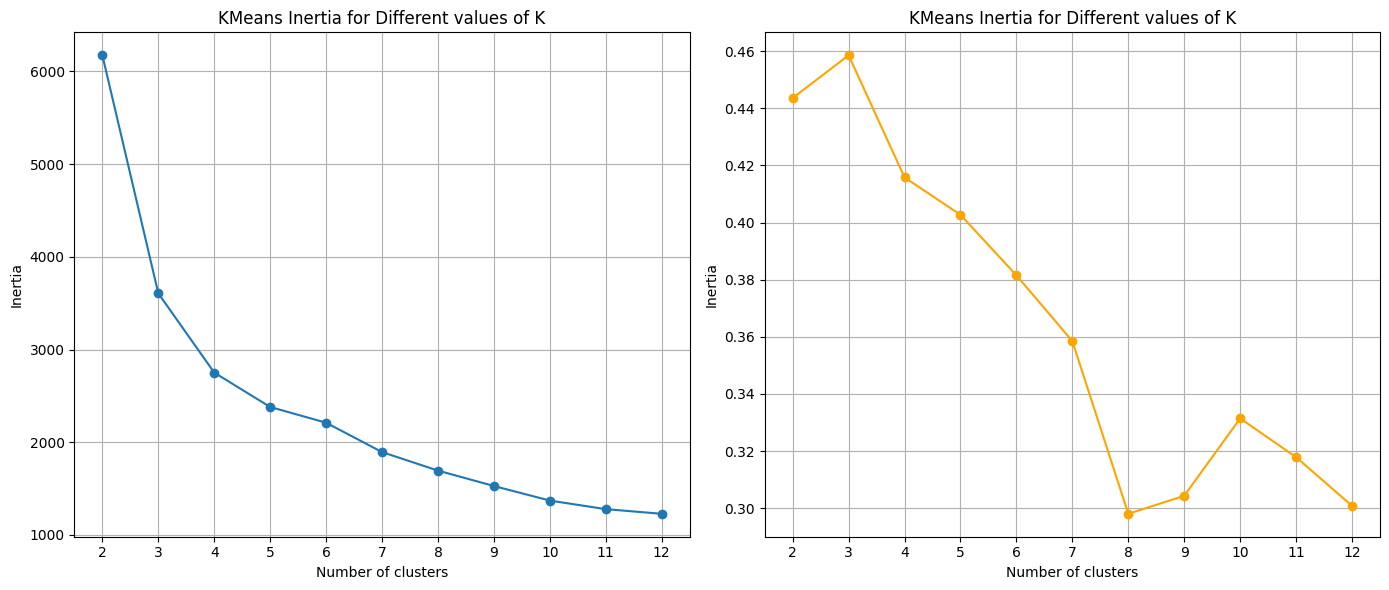

In [243]:

max_k  =12 

inertia = [] 
silhouette_scores = [] 
k_values = range(2, max_k+1) 

for k in k_values: 
    km = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = km.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)
    inertia.append(km.inertia_)

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)

plt.plot(k_values, inertia, marker = "o")
plt.title("KMeans Inertia for Different values of K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker = "o", color="orange")
plt.title("KMeans silhouette score for Different values of K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout() 
plt.show()

## Silhouette Score

The **silhouette score** for a single sample \( i \) is calculated as:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
-  s(i)) is the silhouette score for a single sample \( i \)  
-  a(i)  is the average distance between \( i \) and all other points in the same cluster  
-  b(i)  is the minimum average distance between \( i \) and all points in the nearest cluster to which \( i \) does not belong  

The silhouette score ranges between [-1, 1].  
A higher value indicates more **distinct clusters**.


In [246]:
final_model  = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = final_model.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [248]:
non_outliers_df["Cluster"]  = cluster_labels
non_outliers_df

/var/folders/gg/dm5j6jg565j0bblwgpt9ggsw0000gn/T/ipykernel_47633/3460404256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"]  = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


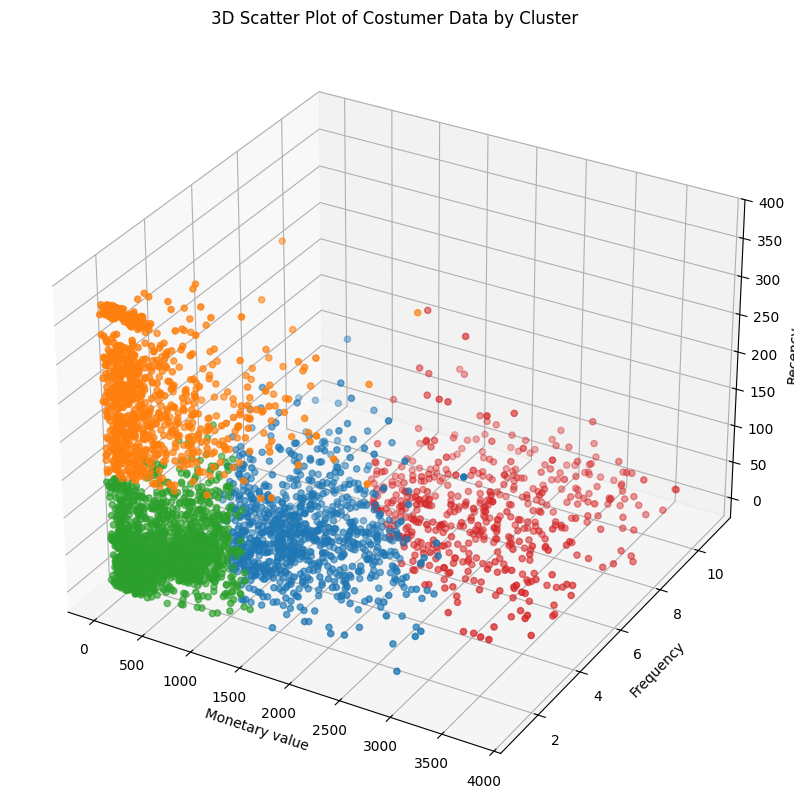

In [251]:
cluster_colors = {0: '#1f77b4',
                  1: '#ff7f0e',
                  2: '#2ca02c',
                  3: '#d62728'
                 }

colors = non_outliers_df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax  =fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], 
                    non_outliers_df["Frequency"],
                    non_outliers_df["Recency"],
                    c = colors, 
                    marker = "o")

ax.set_xlabel("Monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Costumer Data by Cluster")

plt.show()

Text(0, 0.5, 'Recency')

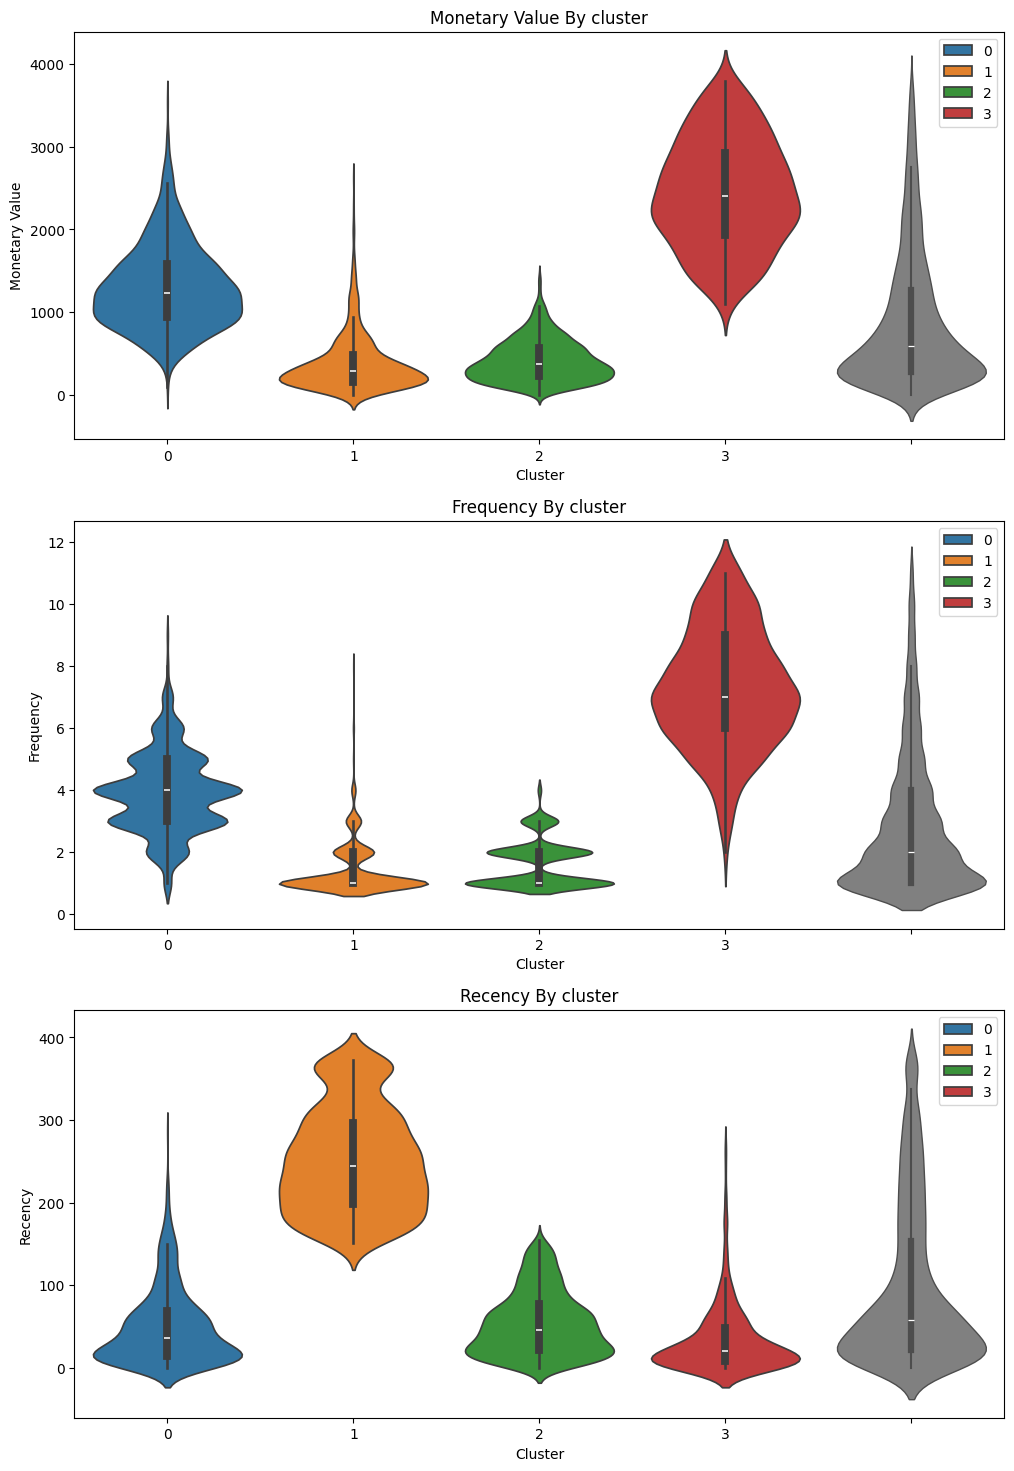

In [257]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1) 
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["MonetaryValue"], palette=cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["MonetaryValue"], color ="gray", linewidth=1.0)
plt.title("Monetary Value By cluster")
plt.ylabel("Monetary Value")



plt.subplot(3, 1, 2) 
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["Frequency"], palette=cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["Frequency"], color ="gray", linewidth=1.0)
plt.title("Frequency By cluster")
plt.ylabel("Frequency")


plt.subplot(3, 1, 3) 
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["Recency"], palette=cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["Recency"], color ="gray", linewidth=1.0)
plt.title("Recency By cluster")
plt.ylabel("Recency")



### 🔵 Cluster 0 (Blue) — "Retain"

- **Rationale** :
  - This cluster represents high-value customers.
  - They purchase regularly, though not always very recently.
  - The focus should be on retention efforts to maintain their loyalty and spending levels.

- **Action** :
  - Implement loyalty programs.
  - Offer personalized deals based on purchase history.
  - Ensure regular engagement (e.g., newsletters, special offers) to keep them active.


### 🟠 Cluster 1 (Orange) — "Re-Engage"

- **Rationale** :
  - This group includes **lower-value, infrequent buyers**.
  - They **haven't purchased recently**.
  - The focus should be on **re-engagement** to bring them back into active purchasing behavior.

- **Action** :
  - Use **targeted marketing campaigns**.
  - Offer **special discounts** or **personalized promotions**.
  - Send **reminders** to encourage them to return and make purchases again.


### 🟢 Cluster 2 (Green) — "Nurture"

- **Rationale** :
  - This cluster represents the **least active** and **lowest-value customers**.
  - However, they have made **recent purchases**.
  - These customers may be **new** or need **nurturing** to increase their engagement and spending.

- **Action** :
  - Focus on **building relationships**.
  - Provide **excellent customer service**.
  - Offer **incentives** to encourage more **frequent purchases**.


### 🔴 Cluster 3 (Red) — "Reward"

- **Rationale** :
  - This cluster includes **high-value, very frequent buyers**.
  - Many of them are still **actively purchasing**.
  - They are your **most loyal customers**, and **rewarding their loyalty** is key to maintaining their engagement.

- **Action** :
  - Implement a **robust loyalty program**.
  - Provide **exclusive offers**.
  - **Recognize their loyalty** to keep them engaged and satisfied.


### Summary of cluster names : 
- Cluster 0 (Blue) : **"Retain"**
- Cluster 1 (Orange) : **"Re-Engage"**
- Cluster 2 (Green) : **"Nurture"**
- Cluster 3 (Red) : **"Reward"**

## Handling of Outliers

In [273]:
overlap_indices = MonetaryValue_outliers.index.intersection(Frequency_outliers.index)

monetary_only_outliers = MonetaryValue_outliers.drop(overlap_indices)
frequency_only_outliers = Frequency_outliers.drop(overlap_indices)
monetary_and_frequency_outliers = MonetaryValue_outliers.loc[overlap_indices]

In [277]:
monetary_only_outliers["Cluster"] = - 1 
frequency_only_outliers["Cluster"] = - 2 
monetary_and_frequency_outliers["Cluster"] = - 3

In [279]:
outliers_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

In [280]:
outliers_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


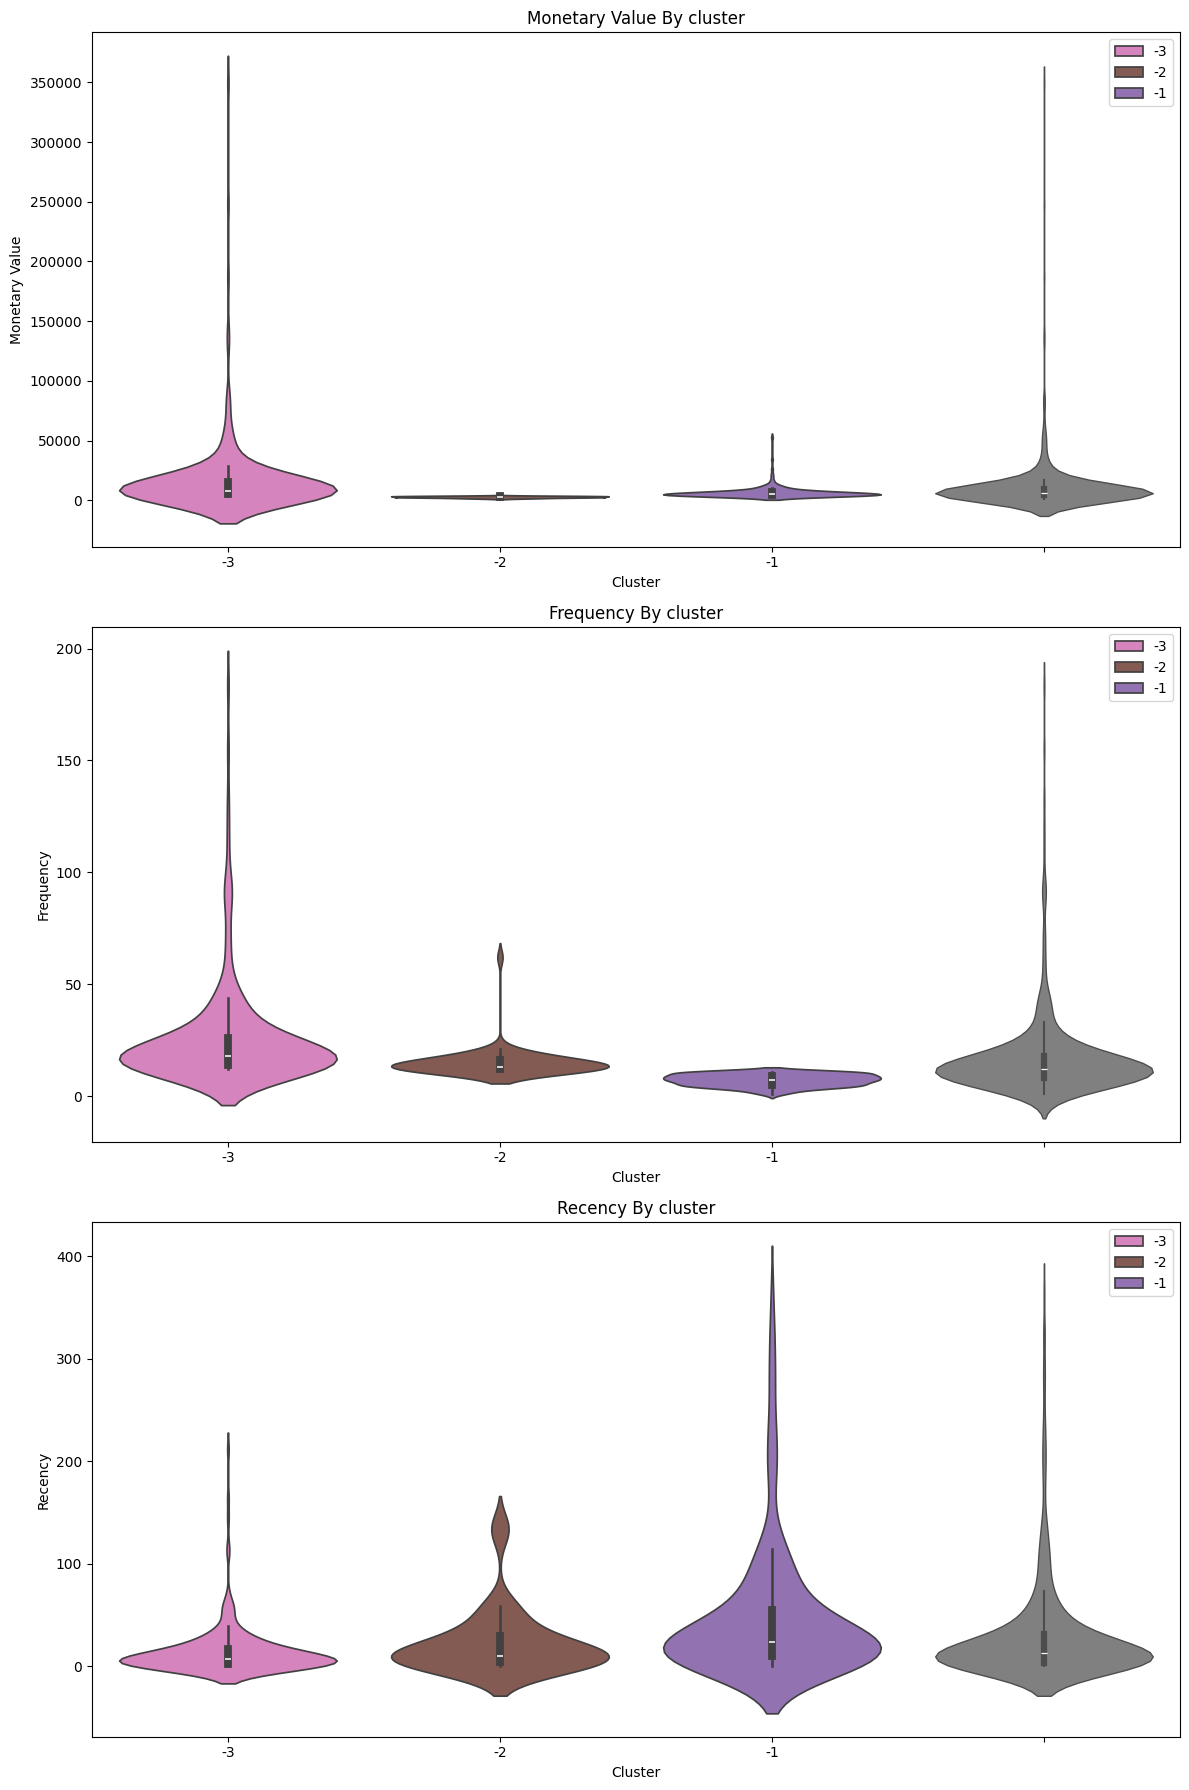

In [284]:
cluster_colors = {- 1: '#9467bd',
                  - 2: '#8c564b',
                  - 3 : '#e377c2'
                  }

plt.figure(figsize=(12, 18))
plt.subplot(3, 1, 1) 
sns.violinplot(x=outliers_clusters_df["Cluster"], y=outliers_clusters_df["MonetaryValue"], palette=cluster_colors, hue = outliers_clusters_df["Cluster"])
sns.violinplot(y = outliers_clusters_df["MonetaryValue"], color ="gray", linewidth=1.0)
plt.title("Monetary Value By cluster")
plt.ylabel("Monetary Value")



plt.subplot(3, 1, 2) 
sns.violinplot(x=outliers_clusters_df["Cluster"], y=outliers_clusters_df["Frequency"], palette=cluster_colors, hue = outliers_clusters_df["Cluster"])
sns.violinplot(y = outliers_clusters_df["Frequency"], color ="gray", linewidth=1.0)
plt.title("Frequency By cluster")
plt.ylabel("Frequency")


plt.subplot(3, 1, 3) 
sns.violinplot(x=outliers_clusters_df["Cluster"], y=outliers_clusters_df["Recency"], palette=cluster_colors, hue = outliers_clusters_df["Cluster"])
sns.violinplot(y = outliers_clusters_df["Recency"], color ="gray", linewidth=1.0)
plt.title("Recency By cluster")
plt.ylabel("Recency")

plt.tight_layout() 
plt.show()

### Cluster -1 (Monetary Outliers) — **PAMPER**

- **Characteristics** : High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
- **Potential Strategy** : Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

---

### Cluster -2 (Frequency Outliers) — **UPSELL**

- **Characteristics** : Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
- **Potential Strategy** : Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

---

### Cluster -3 (Monetary & Frequency Outliers) — **DELIGHT**

- **Characteristics** : The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
- **Potential Strategy** : Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.


In [285]:
cluster_labels = {
    0 : "RETAIN",
    1 : "RE-ENGAGE", 
    2 : "NURTURE", 
    3 : "REWARDS", 
    -1 : "PAMPER", 
    -2 : "UPSELL", 
    -3 : "DELIGHT"
}







In [287]:
full_clustering_df = pd.concat([non_outliers_df, outliers_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [288]:
full_clustering_df["Cluster_Labels"] = full_clustering_df["Cluster"].map(cluster_labels)

In [289]:
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,Cluster_Labels
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


## Visualisation

Text(0, 0.5, 'Average Value')

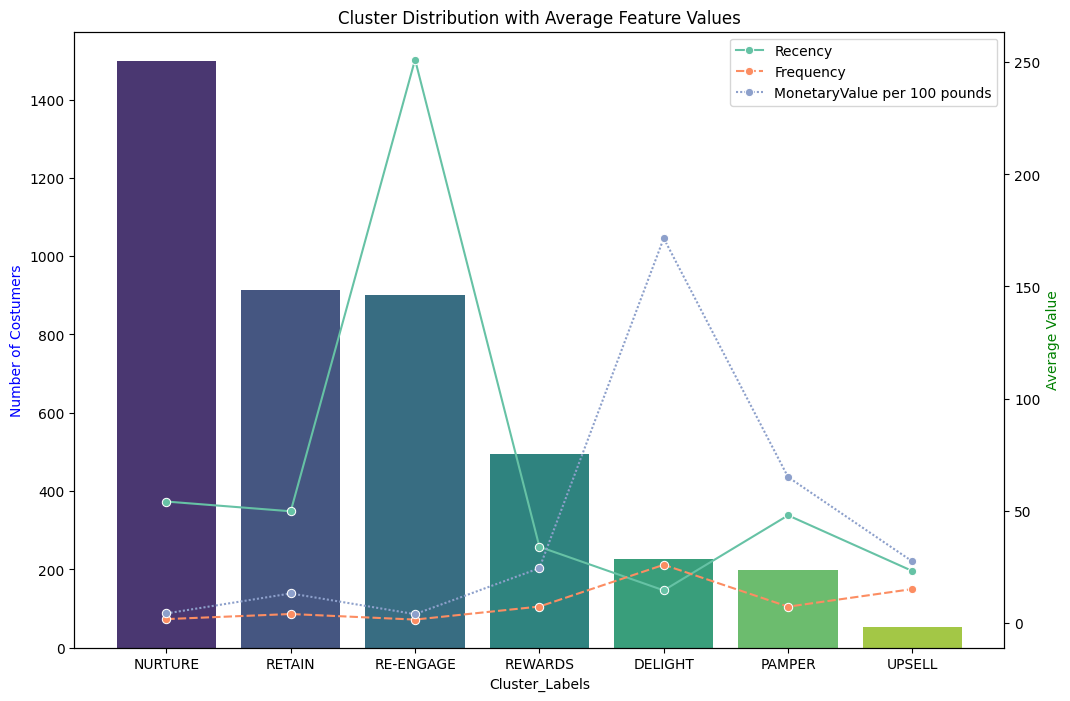

In [305]:
cluster_counts = full_clustering_df["Cluster_Labels"].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby("Cluster_Labels")[["Recency", "Frequency", "MonetaryValue per 100 pounds"]].mean()


fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x = cluster_counts.index, y = cluster_counts.values, ax=ax1, palette = "viridis", hue= cluster_counts.index) 
ax1.set_ylabel("Number of Costumers", color="b") 
ax1.set_title("Cluster Distribution with Average Feature Values")

ax2 = ax1.twinx()
sns.lineplot(data = feature_means, ax=ax2, palette="Set2", marker = 'o')
ax2.set_ylabel("Average Value", color="g")